In [2]:
import pandas as pd
import seaborn as sns
from hw4.scripts.complaint_borough import clean_borough_complaints, get_borough_complaints_summary

In [3]:
data = pd.read_csv("../data/nyc_311_2020.csv")
data = clean_borough_complaints(data)
data_jan_feb = data[(data["created_date"] >= pd.to_datetime("1/1/2020")) & (data["created_date"] < pd.to_datetime("3/1/2020"))]
summary = (data
           .value_counts("complaint_type")
           .sort_values(ascending=False)
           .reset_index()
)

/tmp/ipykernel_2131/3863092226.py:1: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/nyc_311_2020.csv")


In [4]:
top_complaint = summary['complaint_type'][0]
print(top_complaint)

HEAT/HOT WATER


In [15]:
data_jan_feb['month'] = data_jan_feb['created_date'].dt.month
data_jan_feb_top_complaint = (data_jan_feb[data_jan_feb['complaint_type'] == top_complaint]
                              .value_counts("month")
                              .to_frame()
                              .reset_index()
)
data_jan_feb_top_complaint.head()


/tmp/ipykernel_2131/4168546908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jan_feb['month'] = data_jan_feb['created_date'].dt.month


,month,count
0,1,23089
1,2,1147


<Axes: xlabel='month', ylabel='count'>

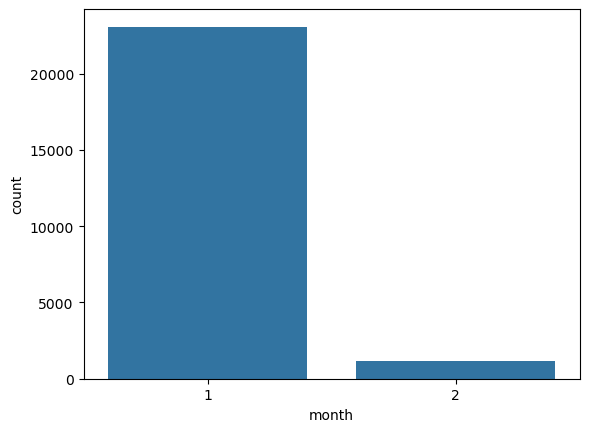

In [16]:
sns.barplot(data = data_jan_feb_top_complaint, x = 'month', y = 'count')

<Axes: xlabel='month', ylabel='count'>

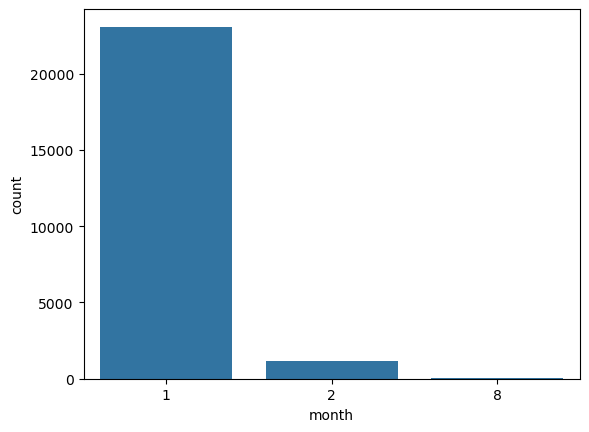

In [24]:
data['month'] = data['created_date'].dt.month
data_top_complaint = (data[data['complaint_type'] == top_complaint]
                              .value_counts("month")
                              .to_frame()
                              .reset_index()
)
# data_jun_jul[data_jun_jul['complaint_type'] == top_complaint].head()

sns.barplot(data = data_top_complaint, x = 'month', y = 'count')